In [28]:
#import all neccesary file
import numpy as np
import pandas as pd 
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = pd.read_csv("healthcare-dataset-stroke-data.csv") # Convert dataset to Data Frame and also upload the dataset.
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [30]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [31]:
data.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [32]:
df_dropped= data.interpolate() # handling missing value( drop the all missing  value and adopted in interpolate method)

df_dropped.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df_dropped.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.00000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.92728,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.77531,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.60000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.10000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [34]:
# converting numeric values 0,1 where  we get any other value
df_dropped.gender[df_dropped.gender=="Male"]=0
df_dropped.gender[df_dropped.gender=="Female"]=1
df_dropped.gender[df_dropped.gender=="Other"]=2
df_dropped.ever_married[df_dropped.ever_married=="Yes"]=0
df_dropped.ever_married[df_dropped.ever_married=="No"]=1
df_dropped.work_type[df_dropped.work_type=='Private']=0
df_dropped.work_type[df_dropped.work_type=='Self-employed']=1 
df_dropped.work_type[df_dropped.work_type=='Govt_job']=2
df_dropped.work_type[df_dropped.work_type=='Never_worked']=3 
df_dropped.work_type[df_dropped.work_type=='children']=3
df_dropped.Residence_type[df_dropped.Residence_type=='Urban']=0
df_dropped.Residence_type[df_dropped.Residence_type=='Rural']=1
df_dropped.smoking_status[df_dropped.smoking_status=='formerly smoked']=0
df_dropped.smoking_status[df_dropped.smoking_status=='never smoked']=1
df_dropped.smoking_status[df_dropped.smoking_status=='smokes']=2
df_dropped.smoking_status[df_dropped.smoking_status=='Unknown']=3
df_dropped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,34.55,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,0,0,83.75,29.30,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.00,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.60,1,0
5108,37544,0,51.0,0,0,0,0,1,166.29,25.60,0,0


Stroke: 4%
No Stroke: 96%



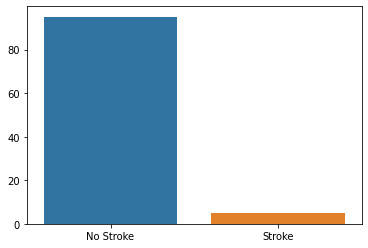

In [35]:
val_counts = df_dropped["stroke"].value_counts()
no_Stroke = (val_counts[0] / df_dropped.shape[0]) * 100
Stroke = (val_counts[1] / df_dropped.shape[0]) * 100

print(f"Stroke: {math.floor(Stroke)}%")
print(f"No Stroke: {math.ceil(no_Stroke)}%")

print()

sns.barplot(x = ["No Stroke", "Stroke"], y = [no_Stroke, Stroke])
plt.show()

In [36]:
val_counts = df_dropped.groupby("hypertension")["stroke"].value_counts()
nohypertension = (val_counts[1][1] /(val_counts[1][1]+val_counts[1][0]))* 100
hypertension= (val_counts[0][1] / (val_counts[0][1]+val_counts[0][0])) * 100

print(f"Hypertention: {hypertension}%")
print(f"No Hypertention: {nohypertension}%")

Hypertention: 3.967909800520382%
No Hypertention: 13.253012048192772%


In [37]:
val_counts = df_dropped.groupby("gender")["stroke"].value_counts()
male_Stroke = (val_counts[1][1] / (val_counts[1][1]+val_counts[1][0])) * 100
female_Stroke = (val_counts[0][1] / (val_counts[0][1]+val_counts[0][0])) * 100

print(f"Male stroke: {male_Stroke}%")
print(f"Female Stoke: {female_Stroke}%")

Male stroke: 4.709418837675351%
Female Stoke: 5.106382978723404%


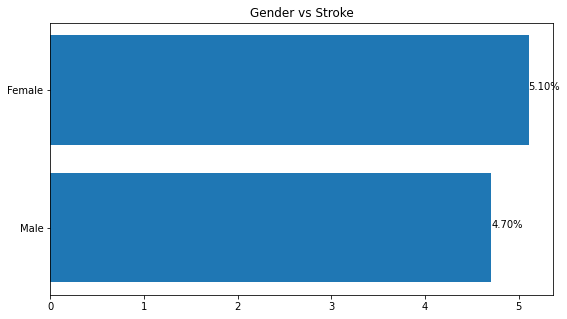

In [38]:
plt.figure(figsize = (9,5))
x = ["Male","Female"]
y = [male_Stroke,female_Stroke]
plt.barh(x, y)
  
for index, value in enumerate(y):
    plt.text(value, index,
             str(value)[:4]+"%")

plt.title("Gender vs Stroke")
plt.show()

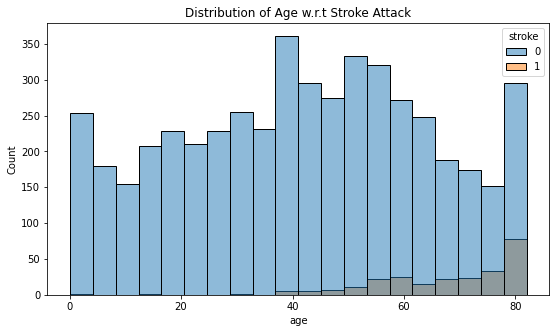

In [39]:
ax = plt.figure(figsize = (9,5))
sns.histplot(
    data=df_dropped,
    x = "age",
    hue="stroke",
)
plt.title("Distribution of Age w.r.t Stroke Attack")
plt.show()

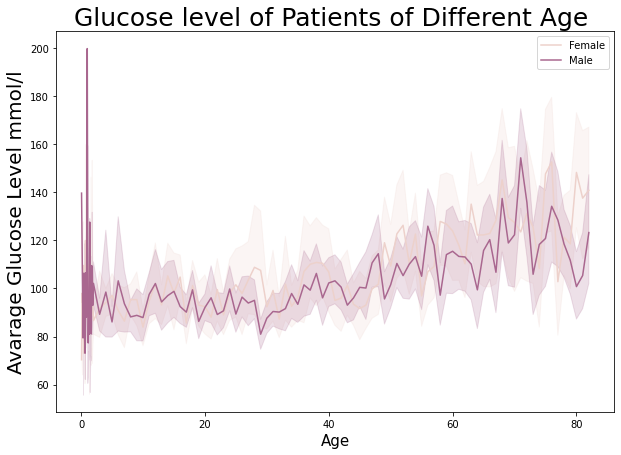

In [40]:
plt.figure(figsize = (10,7))
sns.lineplot(data=df_dropped, x="age", y="avg_glucose_level",hue = "gender")
plt.title("Glucose level of Patients of Different Age ",fontsize = 25)
plt.ylabel("Avarage Glucose Level mmol/l",fontsize = 20)
plt.xlabel("Age",fontsize = 15)
plt.legend(["Female", "Male"], loc ="upper right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

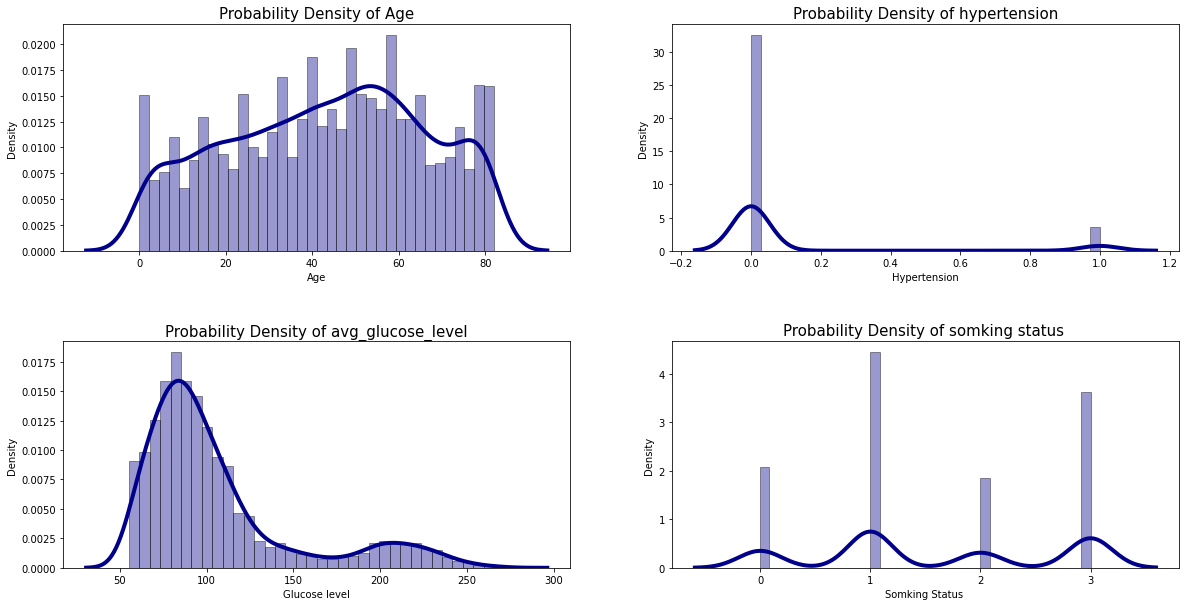

In [41]:

plt.figure(figsize = (20,10))
a = 1
for i in ['age', 'hypertension','avg_glucose_level','smoking_status']:

    plt.subplot(2,2,a)
    sns.distplot(df_dropped[i],hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    if i=="age":

        plt.title("Probability Density of Age",fontsize = 15)
        plt.xlabel("Age",fontsize = 10)

    elif i == "hypertension":
        plt.title("Probability Density of hypertension",fontsize = 15)
        plt.xlabel("Hypertension",fontsize = 10)

    elif i == "avg_glucose_level":
        plt.title("Probability Density of avg_glucose_level",fontsize = 15)
        plt.xlabel("Glucose level",fontsize = 10)
    else:
        plt.title("Probability Density of somking status ",fontsize = 15)
        plt.xlabel("Somking Status ",fontsize = 10)
    a+=1

plt.subplots_adjust(hspace = 0.4)
plt.show()

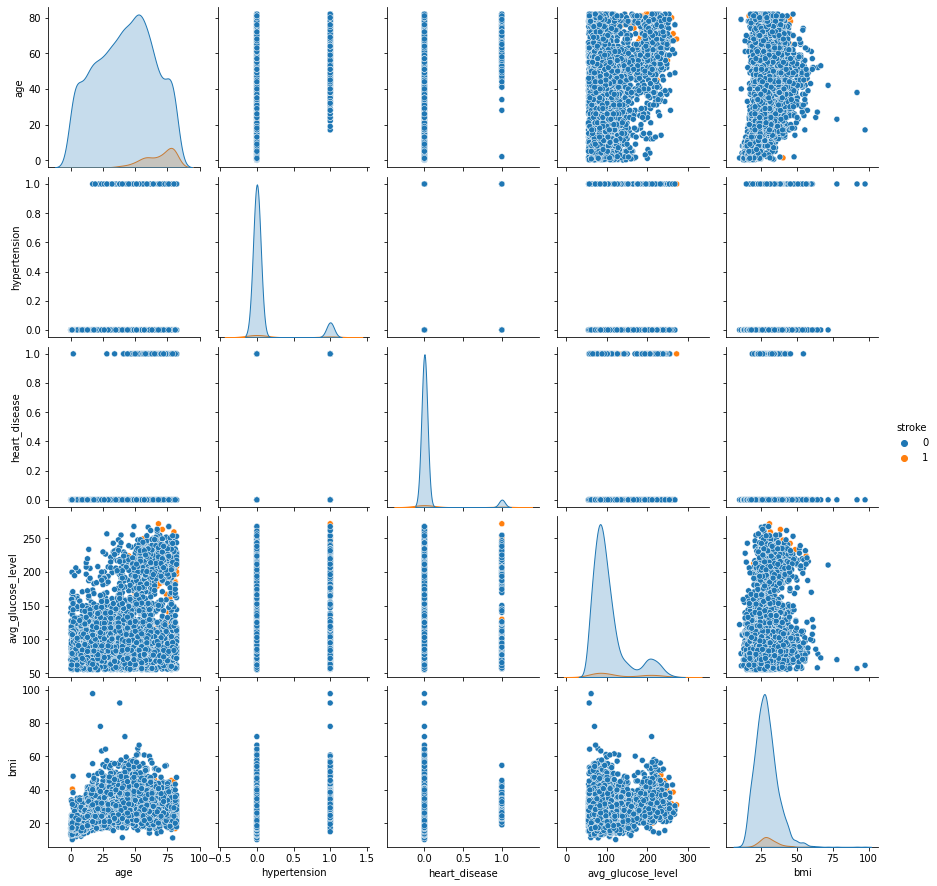

In [42]:
contdata = df_dropped[[ 'age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].copy()

sns.pairplot(contdata ,hue = 'stroke')
plt.show()

                        age  hypertension  ...       bmi    stroke
age                1.000000      0.276398  ...  0.321631  0.245257
hypertension       0.276398      1.000000  ...  0.149985  0.127904
heart_disease      0.263796      0.108306  ...  0.044599  0.134914
avg_glucose_level  0.238171      0.174474  ...  0.168539  0.131945
bmi                0.321631      0.149985  ...  1.000000  0.047351
stroke             0.245257      0.127904  ...  0.047351  1.000000

[6 rows x 6 columns]


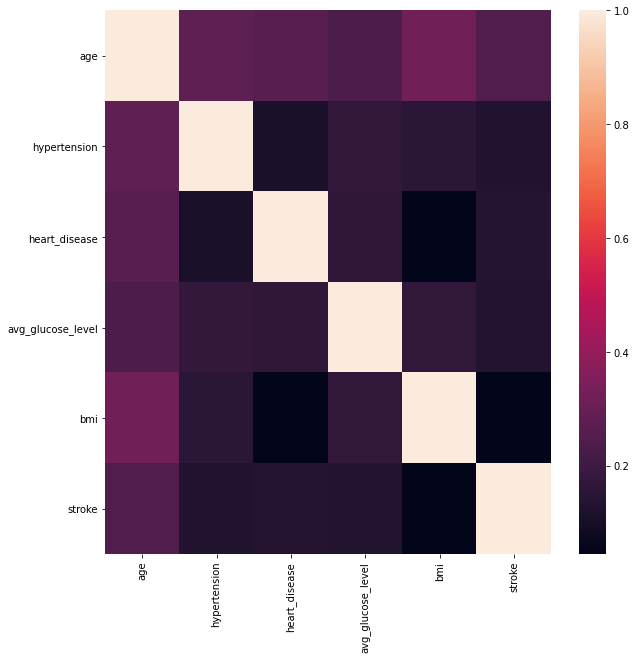

In [53]:
#corelation from heatmap
print(contdata.corr())
plt.figure(figsize=(10,10))
sns.heatmap(contdata.corr())
plt.show()

In [51]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']   #Feature of my dataset

label = ['stroke'] # geting the target value

X = df_dropped[features] # we only take all the  features
y = df_dropped[label]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Instantiatie the classifier 
lr = LogisticRegression(solver="liblinear", random_state=0) # liblinear works better for larger datasets

# Fit to the training data
lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = lr.predict(X_test)

roc_auclr = roc_auc_score(y_test, y_pred_lr) 
print(classification_report(y_test,y_pred_lr))
print(f'ROC-AUC score: {roc_auclr:.2%}')
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred_lr)}\n")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1958
           1       1.00      0.01      0.02        86

    accuracy                           0.96      2044
   macro avg       0.98      0.51      0.50      2044
weighted avg       0.96      0.96      0.94      2044

ROC-AUC score: 50.58%
Confusion Matrix: 
 [[1958    0]
 [  85    1]]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
from sklearn.svm import SVC

# Instantiate the classifier
svc = SVC(random_state=0)

# Fit the model
svc.fit(X_train, y_train)

# Predict on test dataset
y_pred_svc = svc.predict(X_test)

roc_auc_svc = roc_auc_score(y_test, y_pred_svc) 
print(classification_report(y_test,y_pred_svc))
print(f'ROC-AUC score: {roc_auc_svc:.2%}')
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred_svc)}\n")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1958
           1       0.00      0.00      0.00        86

    accuracy                           0.96      2044
   macro avg       0.48      0.50      0.49      2044
weighted avg       0.92      0.96      0.94      2044

ROC-AUC score: 50.00%
Confusion Matrix: 
 [[1958    0]
 [  86    0]]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

clf = tree.DecisionTreeClassifier() # creating classificaton from decision tree
clf = clf.fit(X_train, y_train ) # fitting the training set on decition tree
y_predD=clf.predict(X_test) # predict the test

roc_aucD = roc_auc_score(y_test, y_predD) 
print(classification_report(y_test,y_predD))
print(f'ROC-AUC score: {roc_aucD:.2%}')
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predD)}\n")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1958
           1       0.12      0.19      0.15        86

    accuracy                           0.91      2044
   macro avg       0.54      0.56      0.55      2044
weighted avg       0.93      0.91      0.92      2044

ROC-AUC score: 56.39%
Confusion Matrix: 
 [[1844  114]
 [  70   16]]



In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # creating classificaton from Knn Classification
clf1 = knn.fit(X_train,y_train) # fitting the training set on Knn Classification
y_predK=clf1.predict(X_test)  # predict the test

roc_aucK = roc_auc_score(y_test, y_predK) 
print(classification_report(y_test,y_predK))
print(f'ROC-AUC score: {roc_aucK:.2%}')
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predK)}\n")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1958
           1       0.03      0.01      0.02        86

    accuracy                           0.94      2044
   macro avg       0.50      0.50      0.49      2044
weighted avg       0.92      0.94      0.93      2044

ROC-AUC score: 49.82%
Confusion Matrix: 
 [[1928   30]
 [  85    1]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
predR = model.predict(X_test)
roc_aucR = roc_auc_score(y_test, predR) 
print(classification_report(y_test,predR))
print(f'ROC-AUC score: {roc_aucR:.2%}')
print(f"Confusion Matrix: \n {confusion_matrix(y_test, predR)}\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1958
           1       0.25      0.02      0.04        86

    accuracy                           0.96      2044
   macro avg       0.60      0.51      0.51      2044
weighted avg       0.93      0.96      0.94      2044

ROC-AUC score: 51.01%
Confusion Matrix: 
 [[1952    6]
 [  84    2]]

